# Feature Selection and Dimensionality Reduction Using Covariance Matrix Plot`

## Why are feature seletion and dimentionality reduction important?

1. Prevent Overfitting 

2. Simplicity 

3. Computational Efficiency

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline 

In [4]:
df = pd.read_csv("cruise_ship_info.csv")
                 
df.head(6)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
Ship_name            158 non-null object
Cruise_line          158 non-null object
Age                  158 non-null int64
Tonnage              158 non-null float64
passengers           158 non-null float64
length               158 non-null float64
cabins               158 non-null float64
passenger_density    158 non-null float64
crew                 158 non-null float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [6]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


In [8]:
print(len(df.columns))

df.columns

9


Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew'],
      dtype='object')

## Generate Pairplot 

In [11]:
df.select_dtypes(include='number').columns

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density',
       'crew'],
      dtype='object')

In [13]:
df.select_dtypes(include='number').head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,6,30.277,6.94,5.94,3.55,42.64,3.55
1,6,30.277,6.94,5.94,3.55,42.64,3.55
2,26,47.262,14.86,7.22,7.43,31.80,6.70
3,11,110.000,29.74,9.53,14.88,36.99,19.10
4,17,101.353,26.42,8.92,13.21,38.36,10.00


In [15]:
cols = df.select_dtypes(include='number').columns

cols

Index(['Age', 'Tonnage', 'passengers', 'length', 'cabins', 'passenger_density',
       'crew'],
      dtype='object')

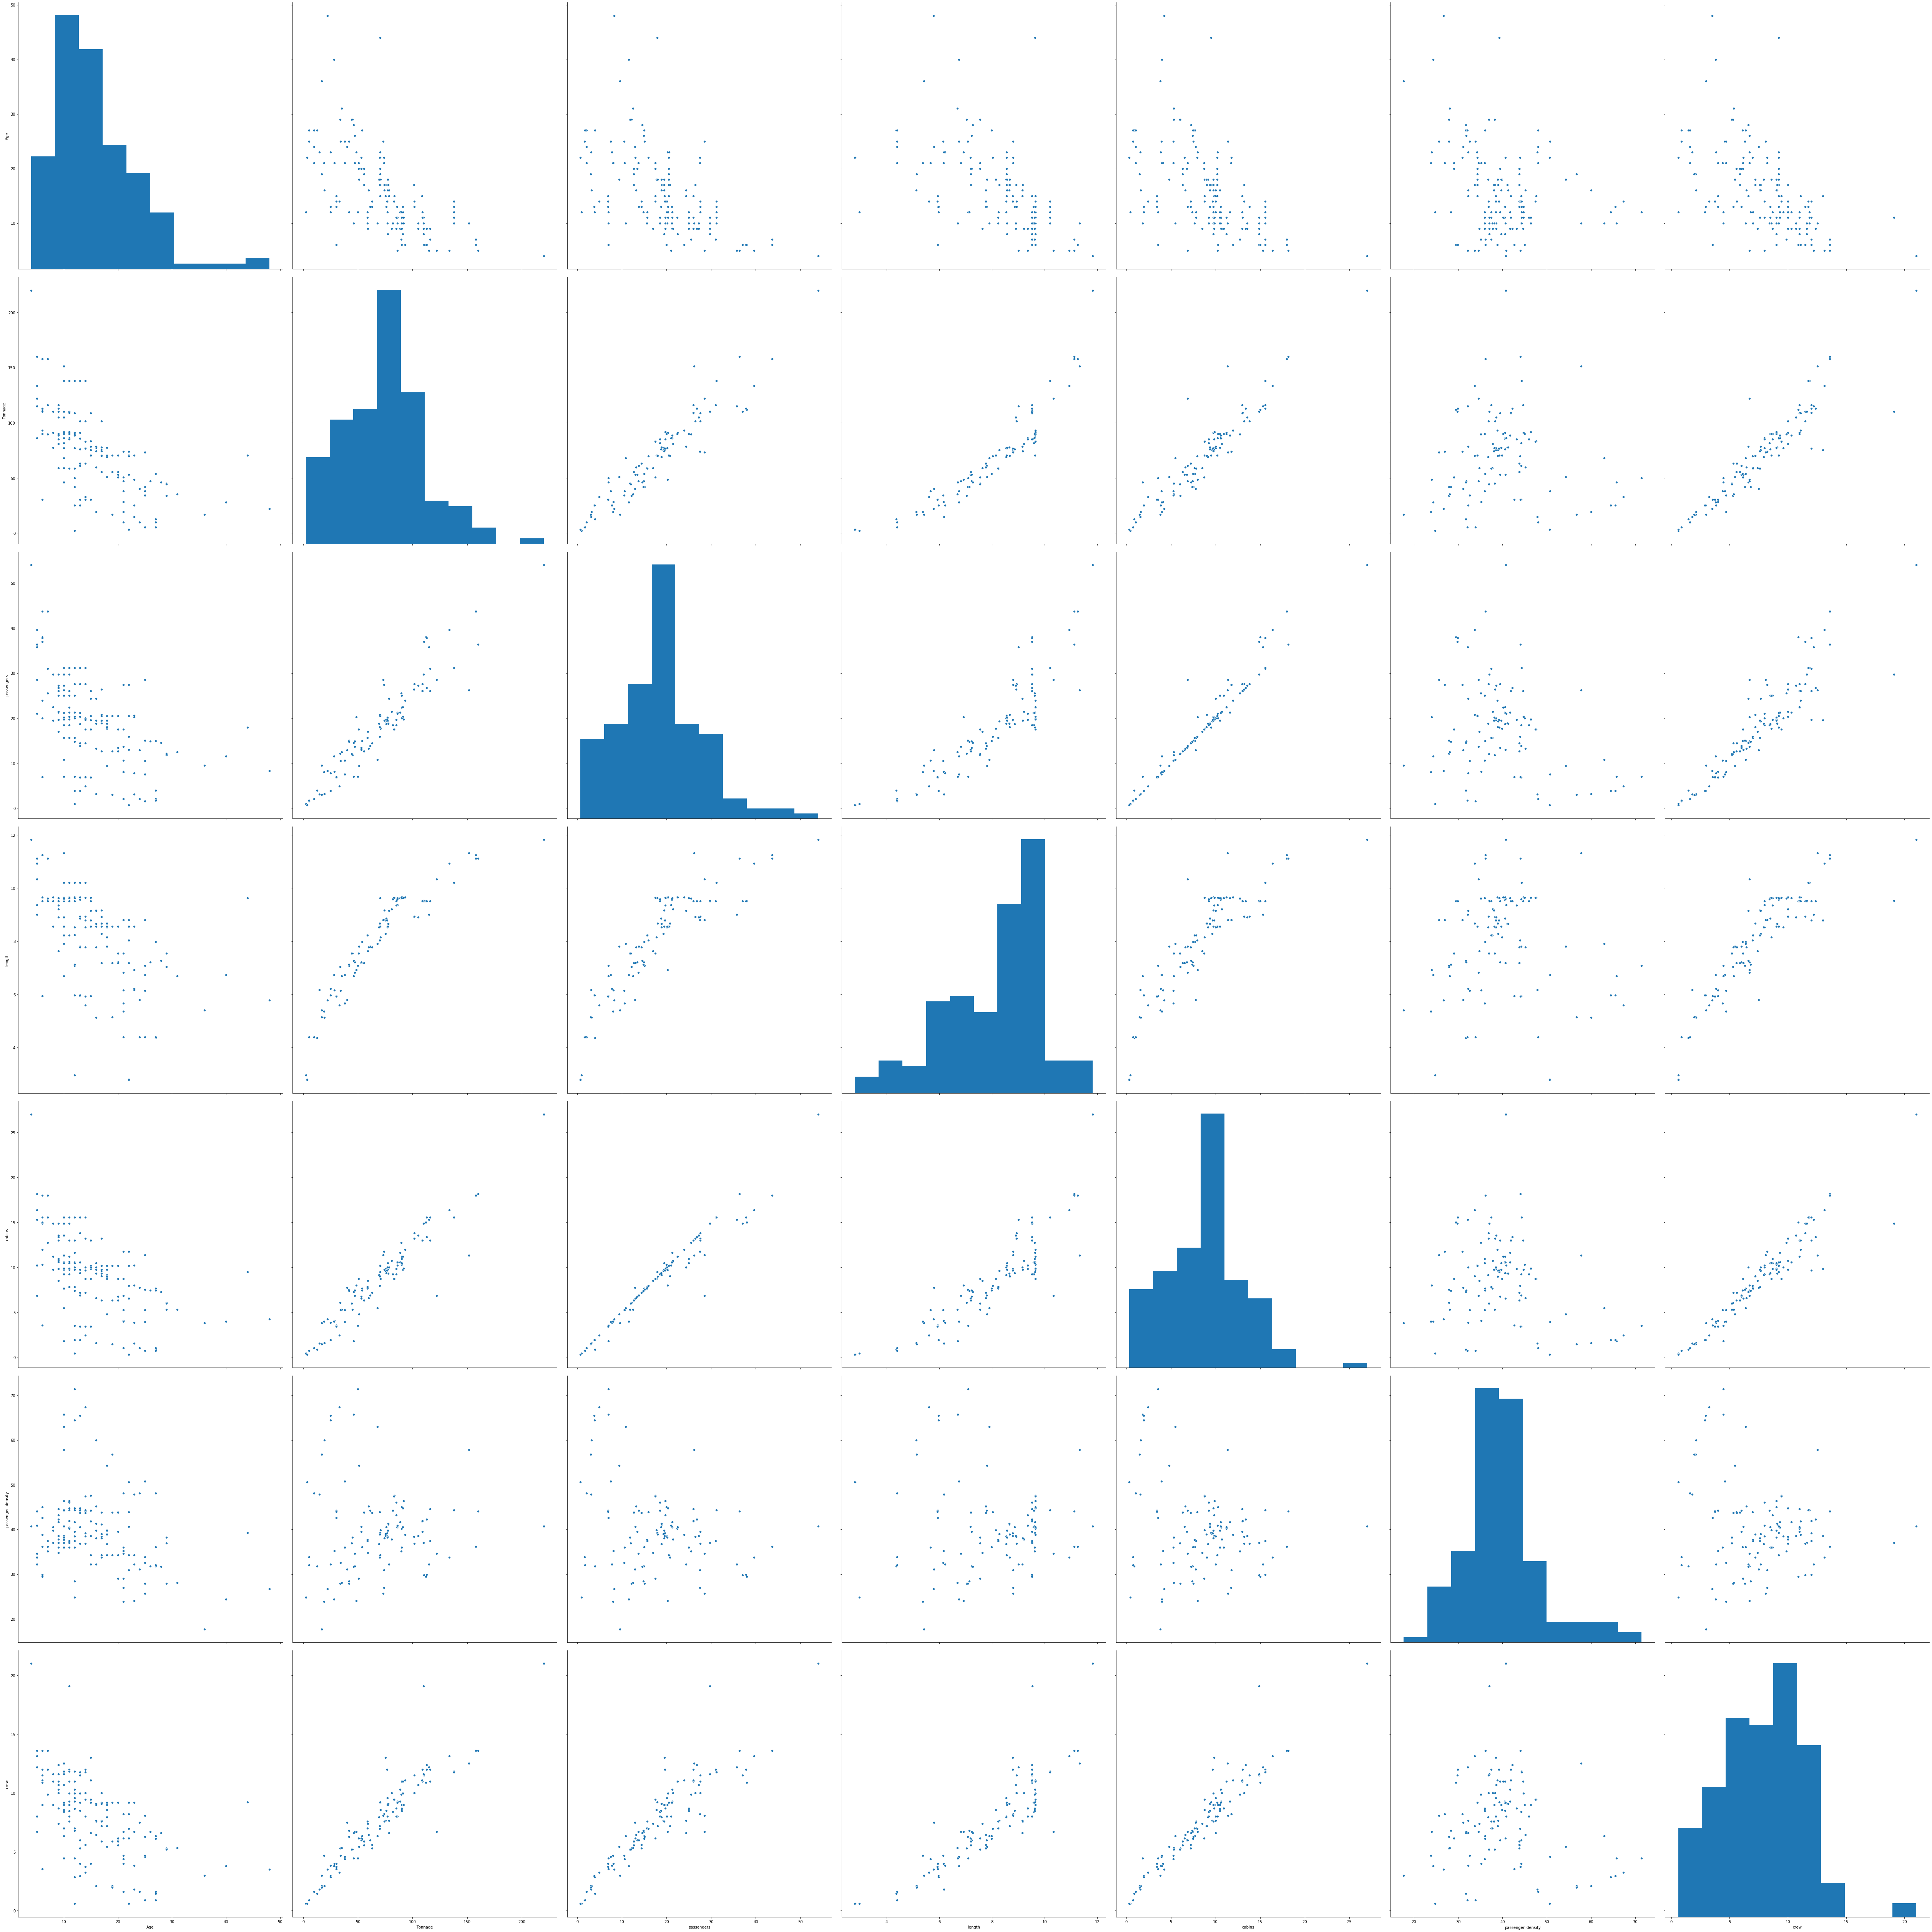

In [17]:
sns.pairplot(df[cols], size= 10)

In [22]:
from sklearn.preprocessing import StandardScaler 

stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

X_std

array([[-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [-1.27640208, -1.10498441, -1.19395611, ..., -1.18458832,
         0.31805658, -1.21526718],
       [ 1.35810515, -0.64731003, -0.37292634, ..., -0.31409539,
        -0.9406764 , -0.31330399],
       ...,
       [ 1.22637979, -1.77666231, -1.74960252, ..., -1.81502263,
        -0.70147068, -1.97978836],
       [ 1.48983051, -1.77666231, -1.74027264, ..., -1.81502263,
        -0.91280777, -1.97978836],
       [ 0.96292907, -1.52350654, -1.59410446, ..., -1.63105247,
         0.92536041, -1.71635785]])

In [21]:
cov_mat =np.cov(X_std.T)

cov_mat

array([[ 1.00636943, -0.61051007, -0.51882598, -0.53567624, -0.51326756,
        -0.28060619, -0.53403648],
       [-0.61051007,  1.00636943,  0.9510809 ,  0.92824328,  0.95480665,
        -0.04110641,  0.93347689],
       [-0.51882598,  0.9510809 ,  1.00636943,  0.8891624 ,  0.9825601 ,
        -0.29674522,  0.92106365],
       [-0.53567624,  0.92824328,  0.8891624 ,  1.00636943,  0.89546571,
        -0.09106483,  0.90156272],
       [-0.51326756,  0.95480665,  0.9825601 ,  0.89546571,  1.00636943,
        -0.25479336,  0.9568788 ],
       [-0.28060619, -0.04110641, -0.29674522, -0.09106483, -0.25479336,
         1.00636943, -0.15649979],
       [-0.53403648,  0.93347689,  0.92106365,  0.90156272,  0.9568788 ,
        -0.15649979,  1.00636943]])

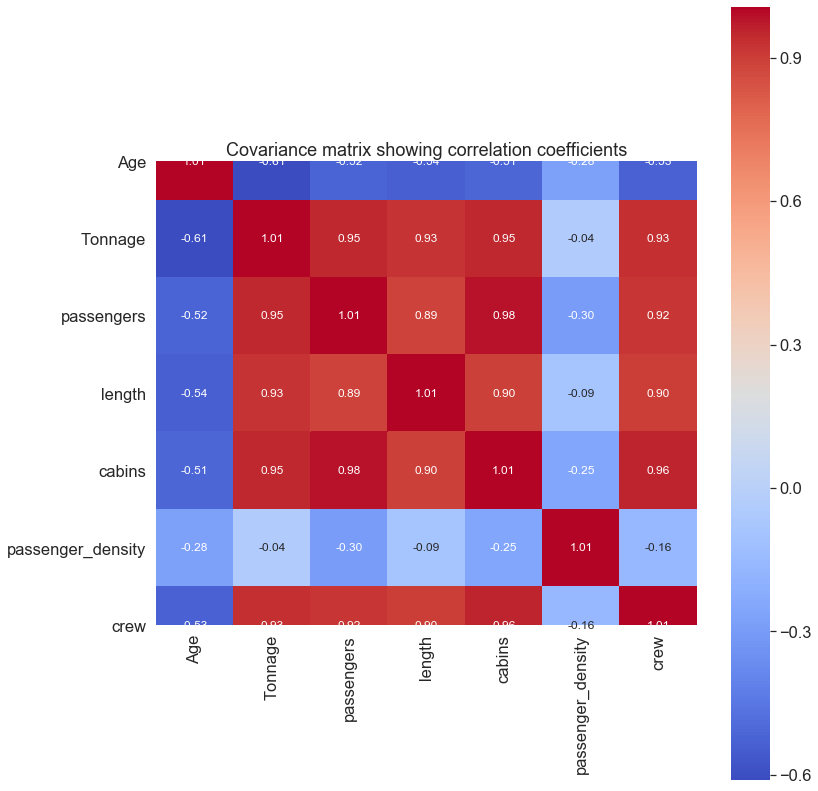

In [26]:
plt.figure(figsize=(12,12))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

From the covariance matrix plot above, if we assume important features have a correlation coefficient of 0.6 or greater, then we see that the “crew” variable correlates strongly with 4 predictor variables: “tonnage”, “passengers”, “length, and “cabins”.

In [27]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
  
df[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00
